In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [19]:
X, y = make_regression(n_samples=600, n_features=4, noise=1, random_state=42)

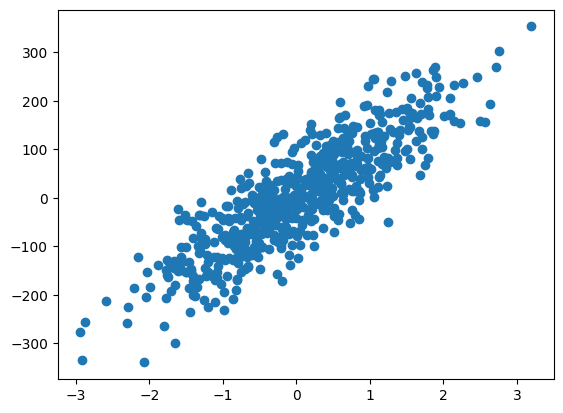

In [ ]:
plt.scatter(X[:,1],y)

In [46]:
np.random.seed(43)
w = np.random.randn()
w


0.25739992534469325

In [60]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch 1/1000, MSE: 29353.3660
Epoch 2/1000, MSE: 28142.8346
Epoch 3/1000, MSE: 26982.4582
Epoch 4/1000, MSE: 25870.1503
Epoch 5/1000, MSE: 24803.9114
Epoch 6/1000, MSE: 23781.8256
Epoch 7/1000, MSE: 22802.0571
Epoch 8/1000, MSE: 21862.8465
Epoch 9/1000, MSE: 20962.5078
Epoch 10/1000, MSE: 20099.4255
Epoch 11/1000, MSE: 19272.0514
Epoch 12/1000, MSE: 18478.9019
Epoch 13/1000, MSE: 17718.5553
Epoch 14/1000, MSE: 16989.6490
Epoch 15/1000, MSE: 16290.8774
Epoch 16/1000, MSE: 15620.9894
Epoch 17/1000, MSE: 14978.7857
Epoch 18/1000, MSE: 14363.1174
Epoch 19/1000, MSE: 13772.8831
Epoch 20/1000, MSE: 13207.0275
Epoch 21/1000, MSE: 12664.5393
Epoch 22/1000, MSE: 12144.4491
Epoch 23/1000, MSE: 11645.8280
Epoch 24/1000, MSE: 11167.7859
Epoch 25/1000, MSE: 10709.4694
Epoch 26/1000, MSE: 10270.0611
Epoch 27/1000, MSE: 9848.7772
Epoch 28/1000, MSE: 9444.8667
Epoch 29/1000, MSE: 9057.6099
Epoch 30/1000, MSE: 8686.3168
Epoch 31/1000, MSE: 8330.3265
Epoch 32/1000, MSE: 7989.0052
Epoch 33/1000, MSE: 766

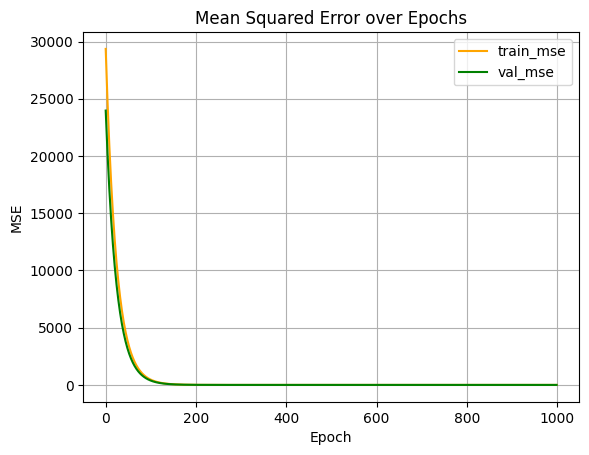

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate data
X, y = make_regression(n_samples=600, n_features=5, noise=1, random_state=42)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


epochs = 1000
lr = 0.01
n_samples, n_features = X_train.shape
weights = np.zeros(n_features)
error_logs = []
val_error_logs=[]

# Gradient Descent Loop
for epoch in range(epochs):
    y_pred = np.dot(X_train,weights)
    error = y_train - y_pred

    val_pred = np.dot(X_val,weights)
    val_error = y_val - val_pred

    gradients = -2 * np.dot(X_train.T, error) / n_samples
    weights = weights - lr * gradients

    mse = np.mean(error**2)
    val_mse = np.mean(val_error**2)

    error_logs.append(mse)
    val_error_logs.append(val_mse)
    
    print(f"Epoch {epoch+1}/{epochs}, MSE: {mse:.4f}")


plt.plot(error_logs,color='orange',label='train_mse')
plt.plot(val_error_logs,color='green',label='val_mse')
plt.title("Mean Squared Error over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

In [143]:
weights

array([43.12527693, 26.01258131, 97.0259112 , 98.35594983, 81.8340101 ])

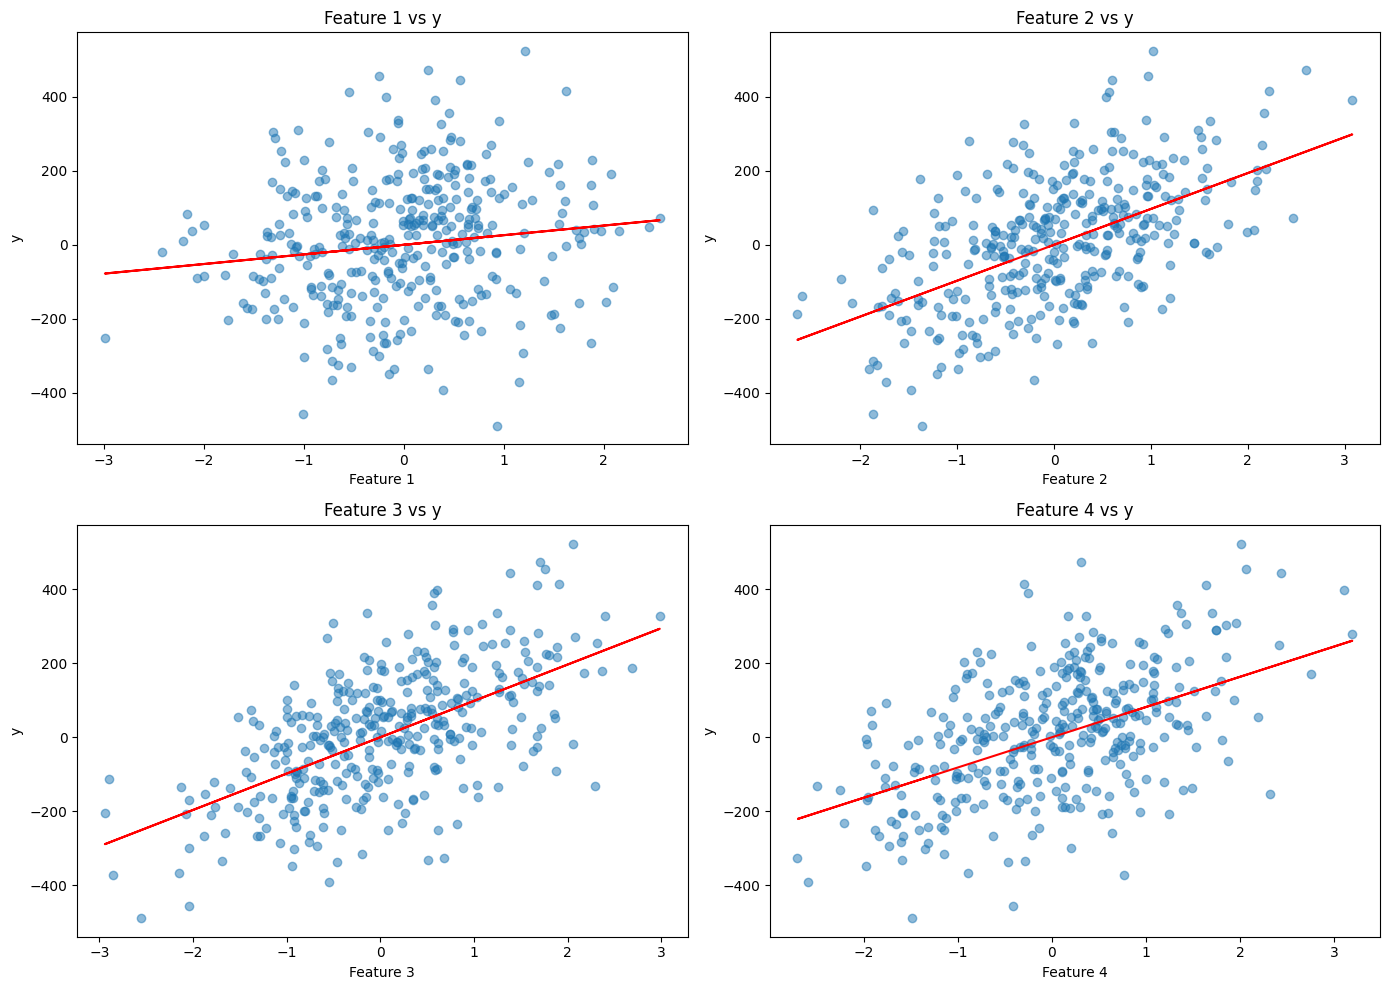

In [144]:
fig, axes = plt.subplots(2, (int)(n_features/2), figsize=(14, 10))

feature_indices = [1, 2, 3, 4] 

for idx, feature_idx in enumerate(feature_indices):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    ax.scatter(X_train[:, feature_idx], y_train, alpha=0.5)
    y_vals = np.dot(X_train[:, feature_idx],weights[feature_idx])
    ax.plot(X_train[:,feature_idx],y_vals,color='red')
    ax.set_xlabel(f'Feature {feature_idx}')
    ax.set_ylabel('y')
    ax.set_title(f'Feature {feature_idx} vs y')

plt.tight_layout()
plt.show()

In [145]:
test_pred = np.dot(X_test,weights)
test_error = y_test - test_pred
test_mes = np.mean(test_error**2)
test_mes


np.float64(1.0518279323488795)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
data = pd.read_csv('../Student_performance_data _.csv')

In [14]:
data.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [15]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [16]:
features = ["ParentalEducation","StudyTimeWeekly","Absences","Tutoring","ParentalSupport"]

In [17]:
y = data['GPA']
data = data[features].copy()

In [31]:
data.head()

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport
0,2,19.833723,7,1,2
1,1,15.408756,0,0,1
2,3,4.210570,26,0,2
3,3,10.028829,14,0,3
4,2,4.672495,17,1,3


Epoch 1/1000, MSE: 13.1308
Epoch 2/1000, MSE: 12.7534
Epoch 3/1000, MSE: 12.3911
Epoch 4/1000, MSE: 12.0433
Epoch 5/1000, MSE: 11.7094
Epoch 6/1000, MSE: 11.3889
Epoch 7/1000, MSE: 11.0813
Epoch 8/1000, MSE: 10.7859
Epoch 9/1000, MSE: 10.5024
Epoch 10/1000, MSE: 10.2302
Epoch 11/1000, MSE: 9.9689
Epoch 12/1000, MSE: 9.7181
Epoch 13/1000, MSE: 9.4773
Epoch 14/1000, MSE: 9.2462
Epoch 15/1000, MSE: 9.0243
Epoch 16/1000, MSE: 8.8113
Epoch 17/1000, MSE: 8.6068
Epoch 18/1000, MSE: 8.4105
Epoch 19/1000, MSE: 8.2220
Epoch 20/1000, MSE: 8.0411
Epoch 21/1000, MSE: 7.8674
Epoch 22/1000, MSE: 7.7007
Epoch 23/1000, MSE: 7.5406
Epoch 24/1000, MSE: 7.3869
Epoch 25/1000, MSE: 7.2394
Epoch 26/1000, MSE: 7.0978
Epoch 27/1000, MSE: 6.9618
Epoch 28/1000, MSE: 6.8312
Epoch 29/1000, MSE: 6.7059
Epoch 30/1000, MSE: 6.5856
Epoch 31/1000, MSE: 6.4701
Epoch 32/1000, MSE: 6.3592
Epoch 33/1000, MSE: 6.2528
Epoch 34/1000, MSE: 6.1506
Epoch 35/1000, MSE: 6.0525
Epoch 36/1000, MSE: 5.9583
Epoch 37/1000, MSE: 5.8678


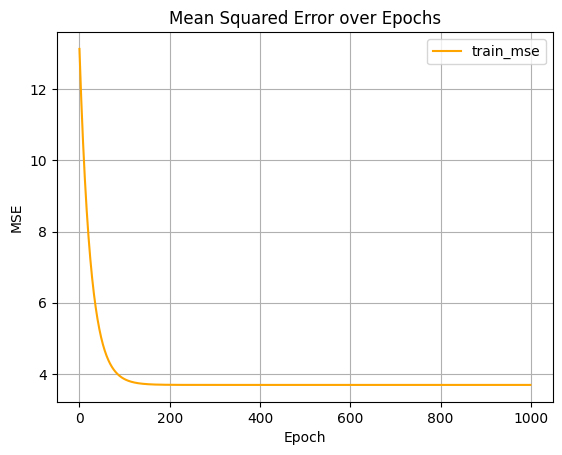

Test MSE: 3.7089
Feature Importance (normalized):
ParentalEducation: 0.0274
StudyTimeWeekly: 0.1167
Absences: 0.6153
Tutoring: 0.0925
ParentalSupport: 0.1480


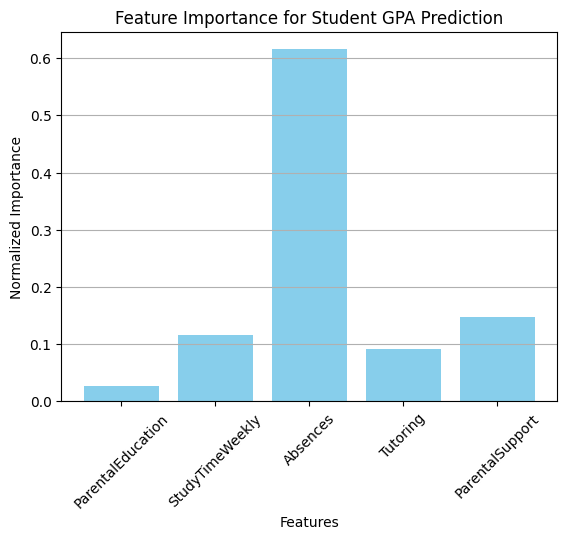

In [ ]:
# You are tasked with predicting student GPA using a neural network model. Your assignment includes the following:

# Data Preparation: Clean and preprocess the student performance dataset to make it suitable for modeling.

# Model Implementation: Build and train a neural network to predict GPA based on the input features.

# Training: Use forward and backward propagation with gradient descent to optimize the network’s weights.

# Evaluation: Measure the model’s accuracy and performance using appropriate regression metrics.

# Analysis: Interpret the results and provide insights on which features most influence student performance.

# Documentation: Everyone be ready your complete code(jupyter Notebook), along with the comments(it'll be helpful)

# and we need to write and train everything from scratch(not using tensorflow or pytorch)......
# we need to do this by creating Neuron and NN classes in python and do it(in that way).

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


# Scale numerical features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], y, test_size=0.2, random_state=42)


# Convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Convert target variable to numpy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Initialize weights
n_features = X_train.shape[1]
weights = np.random.randn(n_features)


# Learning rate and epochs
lr = 0.01
epochs = 1000

# Lists to store error logs
error_logs = []
val_error_logs = []

# Gradient Descent Loop

for epoch in range(epochs):
    # Forward pass
    y_pred = np.dot(X_train, weights)
    error = y_train - y_pred

    # Calculate gradients
    gradients = -2 * np.dot(X_train.T, error) / len(y_train)
    
    # Update weights
    weights -= lr * gradients

    # Calculate Mean Squared Error
    mse = np.mean(error**2)
    
    # Log the error
    error_logs.append(mse)
    
    print(f"Epoch {epoch+1}/{epochs}, MSE: {mse:.4f}")

# Plotting the error logs
plt.plot(error_logs, color='orange', label='train_mse')
plt.title("Mean Squared Error over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

plt.grid(True)
plt.show()

# Evaluate on test set
test_pred = np.dot(X_test, weights)
test_error = y_test - test_pred

test_mse = np.mean(test_error**2)
print(f"Test MSE: {test_mse:.4f}")

# Feature importance analysis
feature_importance = np.abs(weights)
feature_importance = feature_importance / np.sum(feature_importance)  # Normalize
print("Feature Importance (normalized):")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")

# Visualizing feature importance
plt.bar(features, feature_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.title('Feature Importance for Student GPA Prediction')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [43]:
import seaborn as sns

In [52]:
w = np.random.randn(data.shape[1])

In [58]:
# Separate features (X) and target (y)
X = data.copy()
y = y # Reshape for consistency with network output

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the entire dataset
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Target data shape: {y_train.shape}")

Training data shape: (1913, 5)
Testing data shape: (479, 5)
Target data shape: (1913,)


In [ ]:
class Neuron:
    def __init__(self,num_inputs,activations):
        self.weights = np.random.randn(num_inputs,1)*0.01
        self.bias = np.zeros(num_inputs)
        self.activations = activations
        self.input = None
        self.output = None
        self.activated_output = None

    def _relu(self,x):
        return np.maximum(0,x)
    
    def _relu_derivative(self,x):
        return (x > 0).astype(float)
    
    def _sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
     
    def _sigmoid_derivate(self,x):
        s = self._sigmoid(x)
        return s*(1 - s)
    
    def _linear(self, x): # For output layer in regression
        return x

    def _linear_derivative(self, x):
        return 1.0

    def forward(self,inputs):
        self.input = inputs
        self.output = np.dot(inputs,weights) + self.bias

        if self.activation_func == 'relu':
            self.activated_output = self._relu(self.output)
        elif self.activation_func == 'sigmoid':
            self.activated_output = self._sigmoid(self.output)
        elif self.activation_func == 'linear':
            self.activated_output = self._linear(self.output)
        else:
            raise ValueError("Unsupported activation function")
        return self.activated_output


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# The data is stored as a NumPy array
X, y = mnist["data"], mnist["target"]


In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

In [4]:
X_train,X_test = X_train/255.0,X_test/255.0

In [5]:
def to_categorical(x):
    n_col = np.max(x) + 1
    one_hot = np.zeros ((x.shape[0], n_col))
    one_hot [np.arange(x.shape[0]), x] = 1
    return one_hot

In [6]:
y_train,y_test= to_categorical(y_train.astype("int")),to_categorical(y_test.astype("int"))

In [7]:
def load_batches(X,y,batch_size = 64):
    n = X.shape[0]
    for i in np.arange(0,n,batch_size):
        begin = i 
        end = min(i + batch_size,n)

        if y is not None:
            yield X[begin:end],y[begin:end]
        
        else:
            yield X[begin:end]


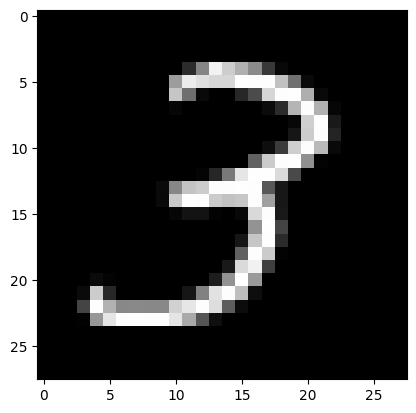

In [8]:
plt.imshow(X_train[0].reshape(28,28),cmap="gray")

In [19]:
class CrossEntropy:
    def __init__(self):
        pass

    def loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.sum(y_true * np.log(y_pred), axis=-1)

    def gradient(self, y_true, y_pred):
        return y_pred - y_true

In [28]:
class LeakyRELU:
    def __init__(self,alpha=0.02):
        self.alpha = alpha

    def forward(self,x):
        return np.where(x>=0,x,self.alpha*x)

    def backward(self,x):
        return np.where(x>=0,1,self.alpha)

    def __call__(self, x):
        return self.forward(x)

In [29]:
class Softmax:
    def __init__(self):
        pass

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

    def backward(self, x):
        s = self.forward(x)
        return s * (1 - s)

In [30]:
class Activation:
    def __init__(self,activation,name="activation"):
        self.activation = activation
        self.gradient = activation.backward
        self.input = None
        self.output = None

    def forward(self,x):
        self.input = x
        return self.activation(x)
    
    def backward(self,grad_flow):
        return self.gradient(self.input)*grad_flow
    

    def __call__(self, x):
        return self.forward(x)

In [31]:
class Layer():

    def __init__(self, n_in, n_out, name="linear"):
        n = 1 / np.sqrt(n_in)
        # init weights
        self.weights = np.random.uniform(-n, n, size=(n_in, n_out))
        self.bias = np.zeros((1, n_out))
        self.input = None
        self.output = None

    def forward(self, x):
        self.input = x
        output = np.dot(x, self.weights) + self.bias
        self.output = output
        return output

    def backward(self, grad_flow, learning_rate=0.01):
        # grad_flow: (batch_size, n_out)
        input_error = np.dot(grad_flow, self.weights.T)  # (batch_size, n_in)
        delta_W = np.dot(self.input.T, grad_flow)        # (n_in, n_out)

        self.weights -= learning_rate * delta_W
        self.bias -= learning_rate * np.mean(grad_flow, axis=0, keepdims=True)

        return input_error

    def __call__(self, x):
        return self.forward(x)


In [40]:
class MLP:
    def __init__(self,input_dim,output_dim,lr=0.01):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.layers = [
            Layer(input_dim,256),
            Activation(LeakyRELU()),
            Layer(256,128),
            Activation(LeakyRELU()),
            Layer(128,64),
            Activation(LeakyRELU()),
            Layer(64,output_dim),
            Activation(Softmax())
        ]
        self.lr = lr

    def forward(self,x):
        for layer in self.layers:
            x  = layer(x)
        return x

    def backward(self,grad_flow):
        for layer in reversed(self.layers):
            grad_flow = layer.backward(grad_flow)
            

    def __call__(self, x):
        return self.forward(x)

In [41]:
model = MLP(784,10)
criterian = CrossEntropy()

In [42]:
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [ ]:
for epoch in range(10):
  loss = []
  acc = []
  for x_batch, y_batch in load_batches(X_train, y_train):
    out = model(x_batch) 
    loss.append(np.mean(criterian.loss(y_batch, out))) 
    acc.append(accuracy(y_batch, out))
    error = criterian.gradient(y_batch, out)
    model.backward(error) # Backpropagation
  
  print(f"Epoch {epoch + 1}, Loss: {np.mean(loss)}, Acc: {np.mean(acc)}")

Epoch 1, Loss: 0.04268799929096255, Acc: 0.991412911084044
Epoch 2, Loss: 0.035929499393046814, Acc: 0.9931866626065774
Epoch 3, Loss: 0.033635950964909477, Acc: 0.9935863276492083
Epoch 4, Loss: 0.03138823571060313, Acc: 0.9942524360535931
Epoch 5, Loss: 0.029256360210180604, Acc: 0.9944046894031668
Epoch 6, Loss: 0.026817777008579693, Acc: 0.994994671132765
Epoch 7, Loss: 0.025204601252683728, Acc: 0.995451431181486
Epoch 8, Loss: 0.02561924877479488, Acc: 0.9951469244823387
Epoch 9, Loss: 0.021944948125203603, Acc: 0.996307856272838
Epoch 10, Loss: 0.02110824061013994, Acc: 0.9965362362971986


In [53]:
from sklearn.metrics import confusion_matrix,precision_score

In [49]:
conf = confusion_matrix(np.argmax(y_test,axis=-1),np.argmax(model(X_test),axis=-1))

In [51]:
import seaborn as sns

<Axes: >

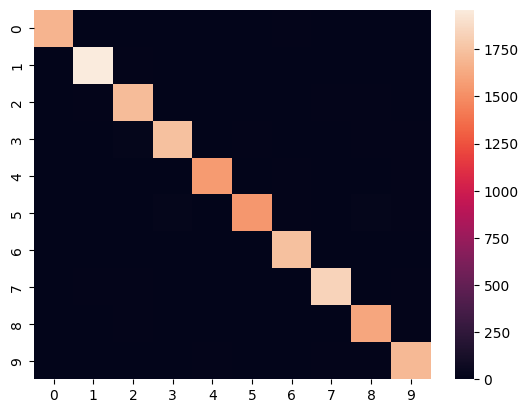

In [52]:
sns.heatmap(conf)

In [54]:
predictions = model(X_test)

In [61]:
precision = precision_score(np.argmax(y_test,axis = -1),np.argmax(predictions,axis=-1),average="weighted")

In [62]:
precision

0.976784309872724

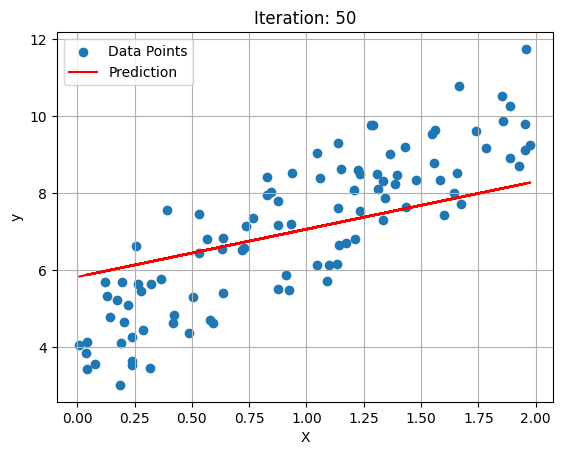

array([[5.82711725],
       [1.24115708]])

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

def train_with_l2(X, y, learning_rate=0.1, n_iters=100, lambda_reg=0.1):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance

    # Initialize weights (bias + one weight)
    theta = np.random.randn(2, 1)

    plt.ion()  # Turn on interactive mode

    for iteration in range(n_iters):
        # Predictions
        y_pred = X_b.dot(theta)

        # L2 gradient (no reg for bias term)
        gradients = (2/m) * X_b.T.dot(y_pred - y) + lambda_reg * np.r_[[[0]], theta[1:]]

        # Weight update
        theta -= learning_rate * gradients

        # Clear and plot
        clear_output(wait=True)
        plt.scatter(X, y, label='Data Points')
        plt.plot(X, X_b.dot(theta), color='red', label='Prediction')
        plt.title(f"Iteration: {iteration+1}")
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.draw()
        plt.pause(0.1)

    plt.ioff()  # Turn off interactive mode
    plt.show()

    return theta

# Run training with visualization
train_with_l2(X, y, learning_rate=0.1, n_iters=50, lambda_reg=1.0)

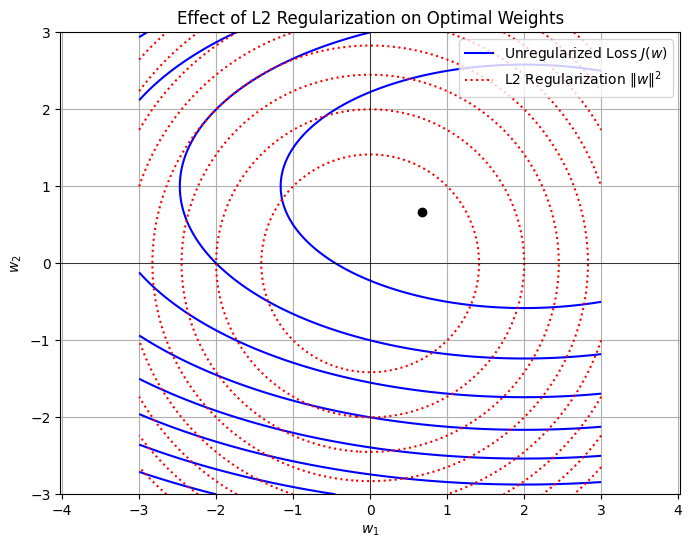

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of w1 and w2 values
w1 = np.linspace(-3, 3, 400)
w2 = np.linspace(-3, 3, 400)
W1, W2 = np.meshgrid(w1, w2)

# Define an unregularized quadratic loss centered away from the origin
# J(w) = a*(w1 - w1_0)^2 + b*(w2 - w2_0)^2
a, b = 0.5, 2.0  # small curvature in w1 direction, large in w2
w1_0, w2_0 = 2.0, 1.0  # location of unregularized minimum
J = a * (W1 - w1_0)**2 + b * (W2 - w2_0)**2

# L2 regularization term
R = W1**2 + W2**2

# Total loss is a weighted sum of both (not plotted here)
# We are only plotting contours of J and R

# Plotting
plt.figure(figsize=(8, 6))
contour_J = plt.contour(W1, W2, J, levels=10, colors='blue', linewidths=1.5)
contour_R = plt.contour(W1, W2, R, levels=10, colors='red', linestyles='dotted', linewidths=1.5)

# Equilibrium point (approximate visual intersection)
# Can be found via optimization, here we approximate manually
w_eq = np.linalg.solve(np.array([[2*a + 2, 0], [0, 2*b + 2]]), 
                       np.array([2*a*w1_0, 2*b*w2_0]))
plt.plot(w_eq[0], w_eq[1], 'ko', label='Equilibrium $\\tilde{w}$')

# Annotations and labels
plt.title("Effect of L2 Regularization on Optimal Weights")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
blue_proxy = plt.Line2D([0], [0], color='blue', label='Unregularized Loss $J(w)$')
red_proxy = plt.Line2D([0], [0], color='red', linestyle='dotted', label='L2 Regularization $\\|w\\|^2$')
plt.legend(handles=[blue_proxy, red_proxy], loc='upper right')
plt.grid(True)
plt.axis('equal')

plt.show()

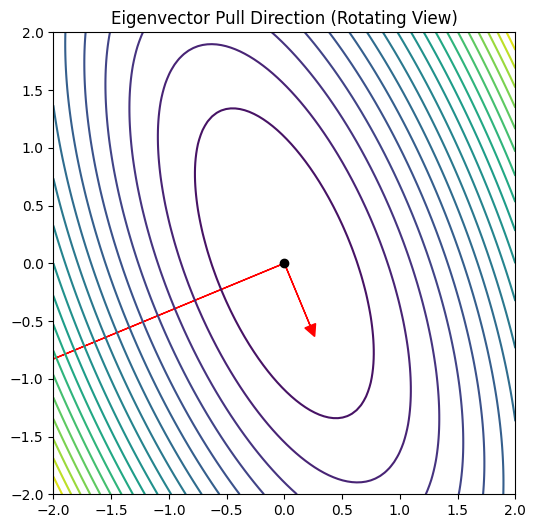

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import clear_output, display
import time

H = np.array([[3.0, 1.0],
              [1.0, 1.0]])

eigvals, eigvecs = np.linalg.eigh(H)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
w_star = np.array([0.0, 0.0])

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        w = np.array([X[i, j], Y[i, j]])
        Z[i, j] = 0.5 * np.dot((w - w_star).T, H @ (w - w_star))

num_frames = 30
angles = np.linspace(0, 2 * np.pi, num_frames)

for angle in angles:
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.contour(X, Y, Z, levels=20, cmap='viridis')
    ax.set_title("Eigenvector Pull Direction (Rotating View)")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

    for i in range(2):
        vec = eigvecs[:, i]
        val = eigvals[i]
        rotated_vec = (np.cos(angle) * vec[0] - np.sin(angle) * vec[1],
                       np.sin(angle) * vec[0] + np.cos(angle) * vec[1])
        ax.arrow(w_star[0], w_star[1],
                 rotated_vec[0] * val,
                 rotated_vec[1] * val,
                 head_width=0.1, head_length=0.1, fc='r', ec='r')

    ax.plot(0, 0, 'ko', label="Minimum (w*)")

    clear_output(wait=True)
    display(fig)
    plt.close(fig)
    time.sleep(0.15)

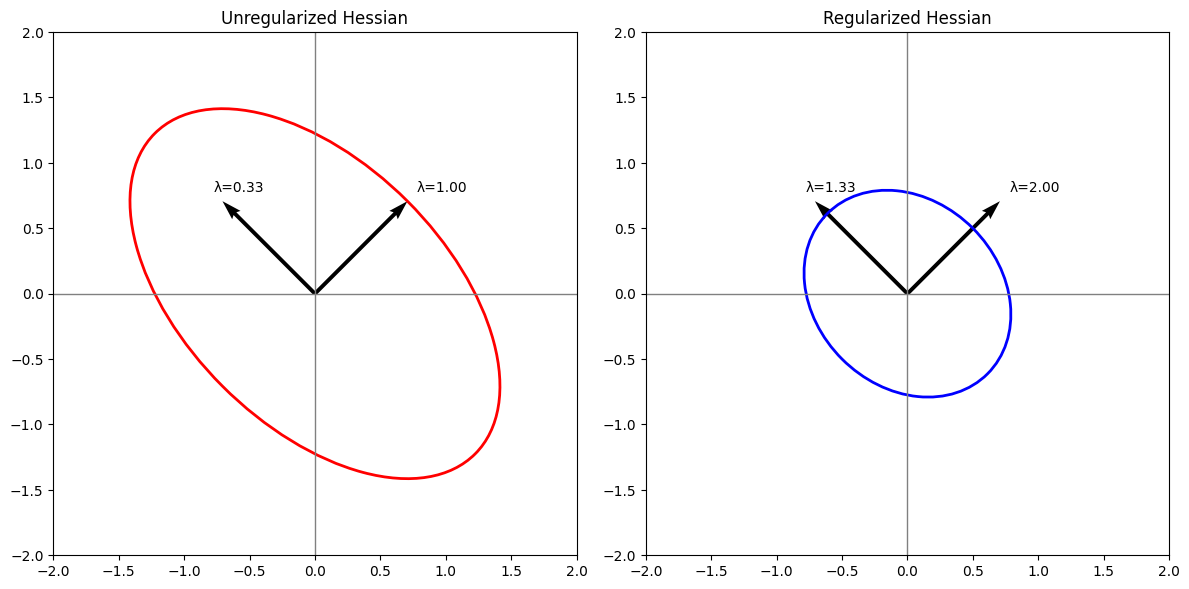

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import clear_output
import time

# Define the Hessians
H_original = np.array([[2/3, 1/3],
                       [1/3, 2/3]])

H_regularized = H_original + np.eye(2)

# Eigen decomposition
eigvals_orig, eigvecs_orig = np.linalg.eigh(H_original)
eigvals_reg, eigvecs_reg = np.linalg.eigh(H_regularized)

# Plotting function
def plot_ellipses(H, eigvals, eigvecs, title, subplot, color):
    ax = plt.subplot(1, 2, subplot)
    ax.set_title(title)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.axhline(0, color='gray', lw=1)
    ax.axvline(0, color='gray', lw=1)

    # Plot eigenvectors
    for i in range(2):
        vec = eigvecs[:, i]
        val = eigvals[i]
        ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='black')
        ax.text(vec[0]*1.1, vec[1]*1.1, f"λ={val:.2f}", fontsize=10)

    # Ellipse shows the level curve of the quadratic form
    U, s, Vt = np.linalg.svd(H)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 / np.sqrt(s)
    ell = Ellipse(xy=(0, 0), width=width, height=height, angle=angle, edgecolor=color,
                  fc='none', lw=2)
    ax.add_patch(ell)

# Plot both original and regularized Hessians
plt.figure(figsize=(12, 6))
plot_ellipses(H_original, eigvals_orig, eigvecs_orig, "Unregularized Hessian", 1, "red")
plot_ellipses(H_regularized, eigvals_reg, eigvecs_reg, "Regularized Hessian", 2, "blue")
plt.tight_layout()
plt.show()